In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy.stats import sem

ModuleNotFoundError: No module named 'scipy'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mouse_df = os.path.join("data","mouse_drug_data.csv")
clinical_df = os.path.join("data","clinicaltrial_data.csv")

In [ ]:
df1 = pd.read_csv(mouse_df)
df2 = pd.read_csv(clinical_df)

In [ ]:
df1

In [ ]:
df2

In [ ]:
df = pd.merge(df1,df2,on="Mouse ID",how="left")

In [ ]:
df_grouped = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]
avrage_tumor = df_grouped.mean()
avrage_tumor = avrage_tumor .reset_index()
avrage_tumor.head()

In [ ]:
standard_error = df_grouped.sem()
standard_error_df = pd.DataFrame(standard_error)
standard_error_df.reset_index(inplace = True)
standard_error_df.head()

In [ ]:
pivot_avrage_tumor = avrage_tumor.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
pivot_avrage_tumor.head()

In [ ]:
cleaned_pivot_avrage_tumor = pivot_avrage_tumor.drop([
    "Ceftamin",
    "Naftisol",
    "Propriva",
    "Ramicane",
    "Stelasyn",
    "Zoniferol"],
    axis = 1)
cleaned_pivot_avrage_tumor

In [ ]:
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
colors =["red","blue","green","black"]
markers =["o","^","s","d"]
fig ,ax = plt.subplots()
for drug in drugs:
    x_axis = pivot_avrage_tumor.index.values
    y_axis = pivot_avrage_tumor[drug]
    err = sem(cleaned_pivot_avrage_tumor[drug])
    index = drugs.index(drug)
    ax.errorbar(x_axis,y_axis,err,linestyle = "--",
                color = colors[index],
                marker = markers[index],
                capsize = 2.5,capthick = 1.5,
                markeredgecolor = "black")
    ax.legend(loc = "best",labels = drugs,fancybox = True,fontsize = 13)
plt.grid(linestyle = "dotted")
ax.set_xlim(0,45)
ax.set_ylim(34,75)
ax.set_title("Tumor Response to Treatment",fontsize = 12)
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()



Observable Trend Concerning Average Tumor Volume:
The mice that were given Ketapril, nfubinol ,and the Placebo had an increase in the average tumor volume over the 45 days ,but the mice that were given Capomuline had a decrease in the average tumor colume over tne 45 days. The resoult shows that there is not a significantly different result between Ketapril, nfubinol ,and the Placebo. however, the Capomulin decreases tumor volume.

In [ ]:
met_sit = df.groupby(["Drug","Timepoint",])["Metastatic Sites"]
means = met_sit.mean()
means = means.reset_index()
means.head()

In [ ]:
met_standard = met_sit.sem()
sems = pd.DataFrame(met_standard)
sems.reset_index(inplace = True)
sems.head()


In [ ]:
pivot_avarage = means.pivot(index = "Timepoint",columns = "Drug",values = "Metastatic Sites")

pivot_avarage.head()

In [ ]:
met_response =pd.pivot_table(df,index=["Timepoint"],values = "Metastatic Sites",
    columns =["Drug"], aggfunc = np.mean)
cleaned_ms = met_response.drop([
        "Ceftamin",
        "Naftisol",
        "Propriva",
        "Ramicane",
        "Stelasyn",
        "Zoniferol"],                                                              
    axis = 1)
cleaned_ms

NameError: name 'cleaned_ms' is not defined

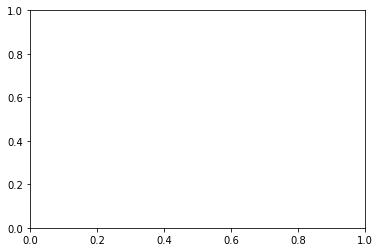

In [2]:
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
colors =["red","blue","green","black"]
markers =["o","^","s","d"]
fig ,ax =plt.subplots()
for drug in drugs:
    x_data = cleaned_ms.index.values
    y_data = cleaned_ms[drug]
    err = sem(cleaned_ms[drug])
    index = drugs.index(drug)
    ax.errorbar(x_data, y_data,err,linestyle = ":",
                color = colors[index],
                marker = markers[index],
                capsize = 2.5,capthick = 1.5,
                markeredgecolor = "black"
           )

ax.legend(loc = "upper left", labels = drugs, fancybox = True,fontsize = 13)
plt.grid(linestyle = "dotted")
ax.set_xlim(0,45)
ax.set_ylim(0,4)
ax.set_title("Metastatic Spred During Treatment",fontsize = 15)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
plt.show()

Observable Trend Concerning the Average of Metastatic Sites: 
over the 45 days,the Placebo having the highest average metastatic sites at all times and also Ketapril had statistically no effect.However, by day 45 only Capomulin and Infubinol had statistically significant lower average metastatic sites than the placebo.

In [ ]:
survive_rate = pd.pivot_table(df,index = ["Timepoint"],values = "Tumor Volume (mm3)",
    columns = ["Drug"], aggfunc = "count")
cleaned_survive = survive_rate.drop([
    "Ceftamin",
    "Naftisol",
    "Propriva",
    "Ramicane",
    "Stelasyn",
    "Zoniferol"],
    axis = 1)
cleaned_survive

In [ ]:
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
colors = ["red","blue","green","black"]
markers = ["o","^","s","d"]
fig ,ax = plt.subplots()
for drug in drugs:
    x_data = cleaned_survive.index.values
    y_data = cleaned_survive[drug]* 100 / cleaned_survive[drug][0]
    index = drugs.index(drug)
    ax.plot(x_data, y_data,linestyle = "--",
                color = colors[index],
                marker = markers[index],
                markeredgecolor = "black" )

ax.legend(loc = "down left", labels = drugs, fancybox = True, numpoints = 2,edgecolor = "black")
plt.grid(linestyle = "dotted")
ax.set_xlim(0,45)
ax.set_ylim(0,102)
ax.set_title("Survival During Treatment",fontsize=15)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate(%)")
plt.show()

Observable Trend Concerning the Survival Rate Over 45 days:
Capomulin, has siginicantly higher survival rate during the 45 days. Ketapril and Infubinol had same survaival rate dropped with almost edual rate till day 30 but after that Infubinol had dropped.

In [ ]:
summary = round(((
    cleaned_pivot_avrage_tumor.iloc[9,:]-cleaned_pivot_avrage_tumor.iloc[0,:])*100/
    cleaned_pivot_avrage_tumor.iloc[0,:]),0).to_frame()
summary = summary.rename(columns = {0:"%Tumor Change"})
summary

In [ ]:
percent_change = (pivot_avrage_tumor.iloc[-1]/(pivot_avrage_tumor.iloc[0])-1)*100
percent_change

In [ ]:
data_passing = percent_change < 0
drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
change_list = ([ percent_change[drug]for drug in drugs])
plt_change = plt.bar(drugs, change_list, width = -1, align="edge",color= data_passing.map({ True:"g",False:"r"}))
plt.grid()
ax.set_ylim(-30,70)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2 
        else:
             label_position = -8
        plt.text(
            rect.get_x() + rect.get_width()/2.,
            label_position ,
            "%d" % int(height)+ "%",
            color= "yellow",
            ha = "center", va = "bottom")
autolabel (plt_change)

Observable Trend Concerning of the Tomur Volume change:
Az we can see in the last graph, and acording to the trends and Tomur Volume change percentage, we could tell that Capomulin had the best result between compared drugs.